# 1. Exploratory Data Analysis (EDA)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df= pd.read_excel("glass.xlsx")
df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [3]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
df.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [5]:
df.dtypes

RI      float64
Na      float64
Mg      float64
Al      float64
Si      float64
K       float64
Ca      float64
Ba      float64
Fe      float64
Type      int64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


# 2. Data Preprocessing

In [7]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
209    False
210    False
211    False
212    False
213    False
Length: 214, dtype: bool

In [8]:
df.duplicated().sum()

1

In [9]:
df=df.drop_duplicates()

In [10]:
df.duplicated().sum()

0

In [11]:
df.isnull().sum()

RI      0
Na      0
Mg      0
Al      0
Si      0
K       0
Ca      0
Ba      0
Fe      0
Type    0
dtype: int64

# 3. Data Visualization:

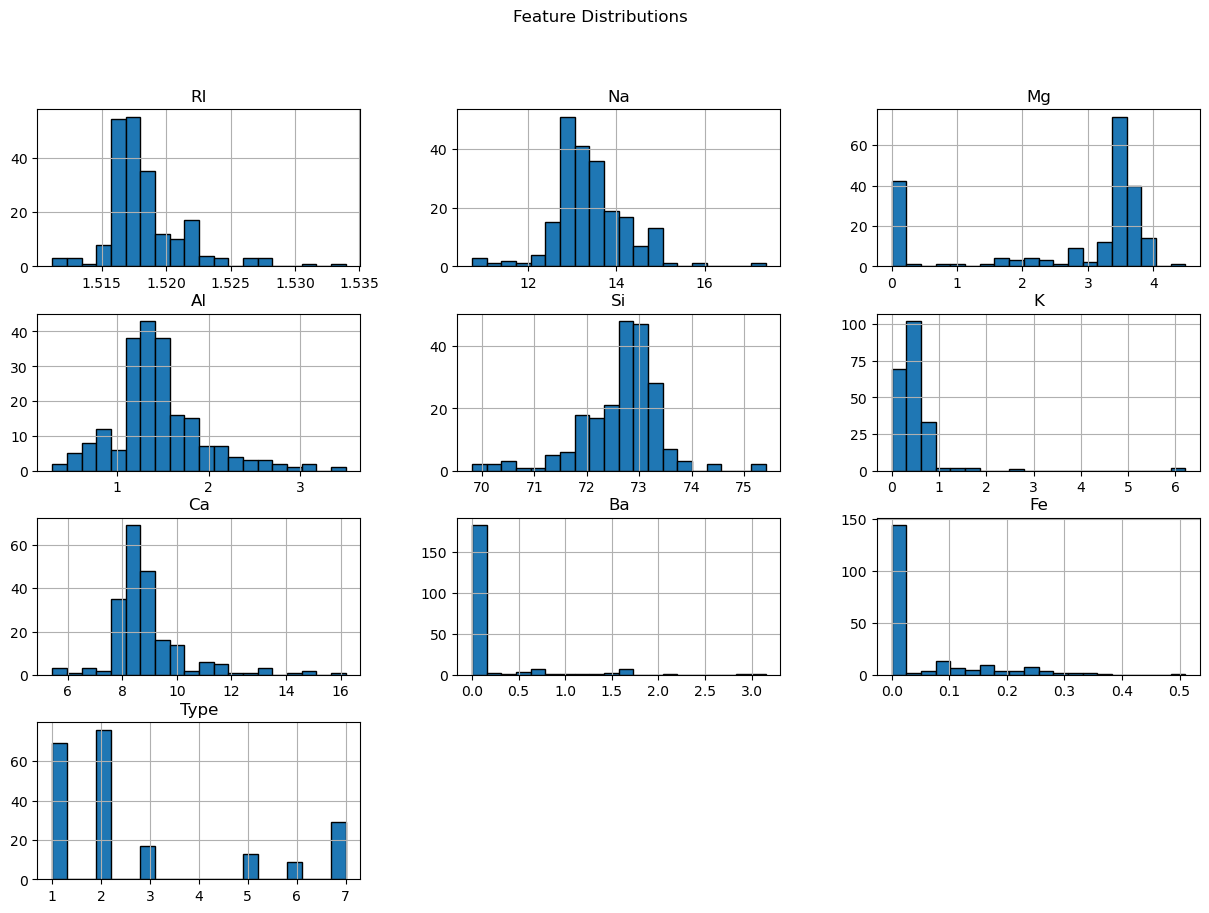

In [12]:
# Histograms for all features
df.hist(bins=20, figsize=(15, 10), edgecolor='black')
plt.suptitle('Feature Distributions')
plt.show()

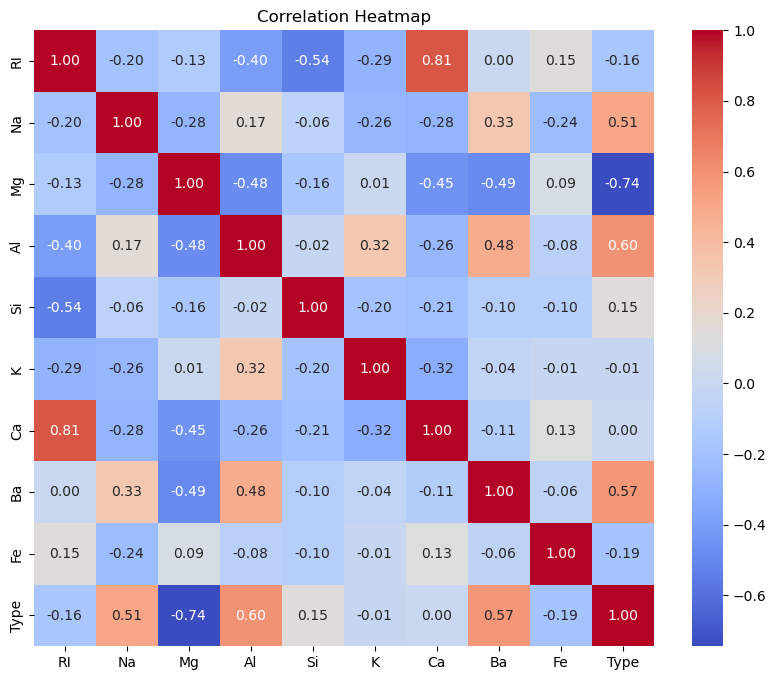

In [13]:
# Correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

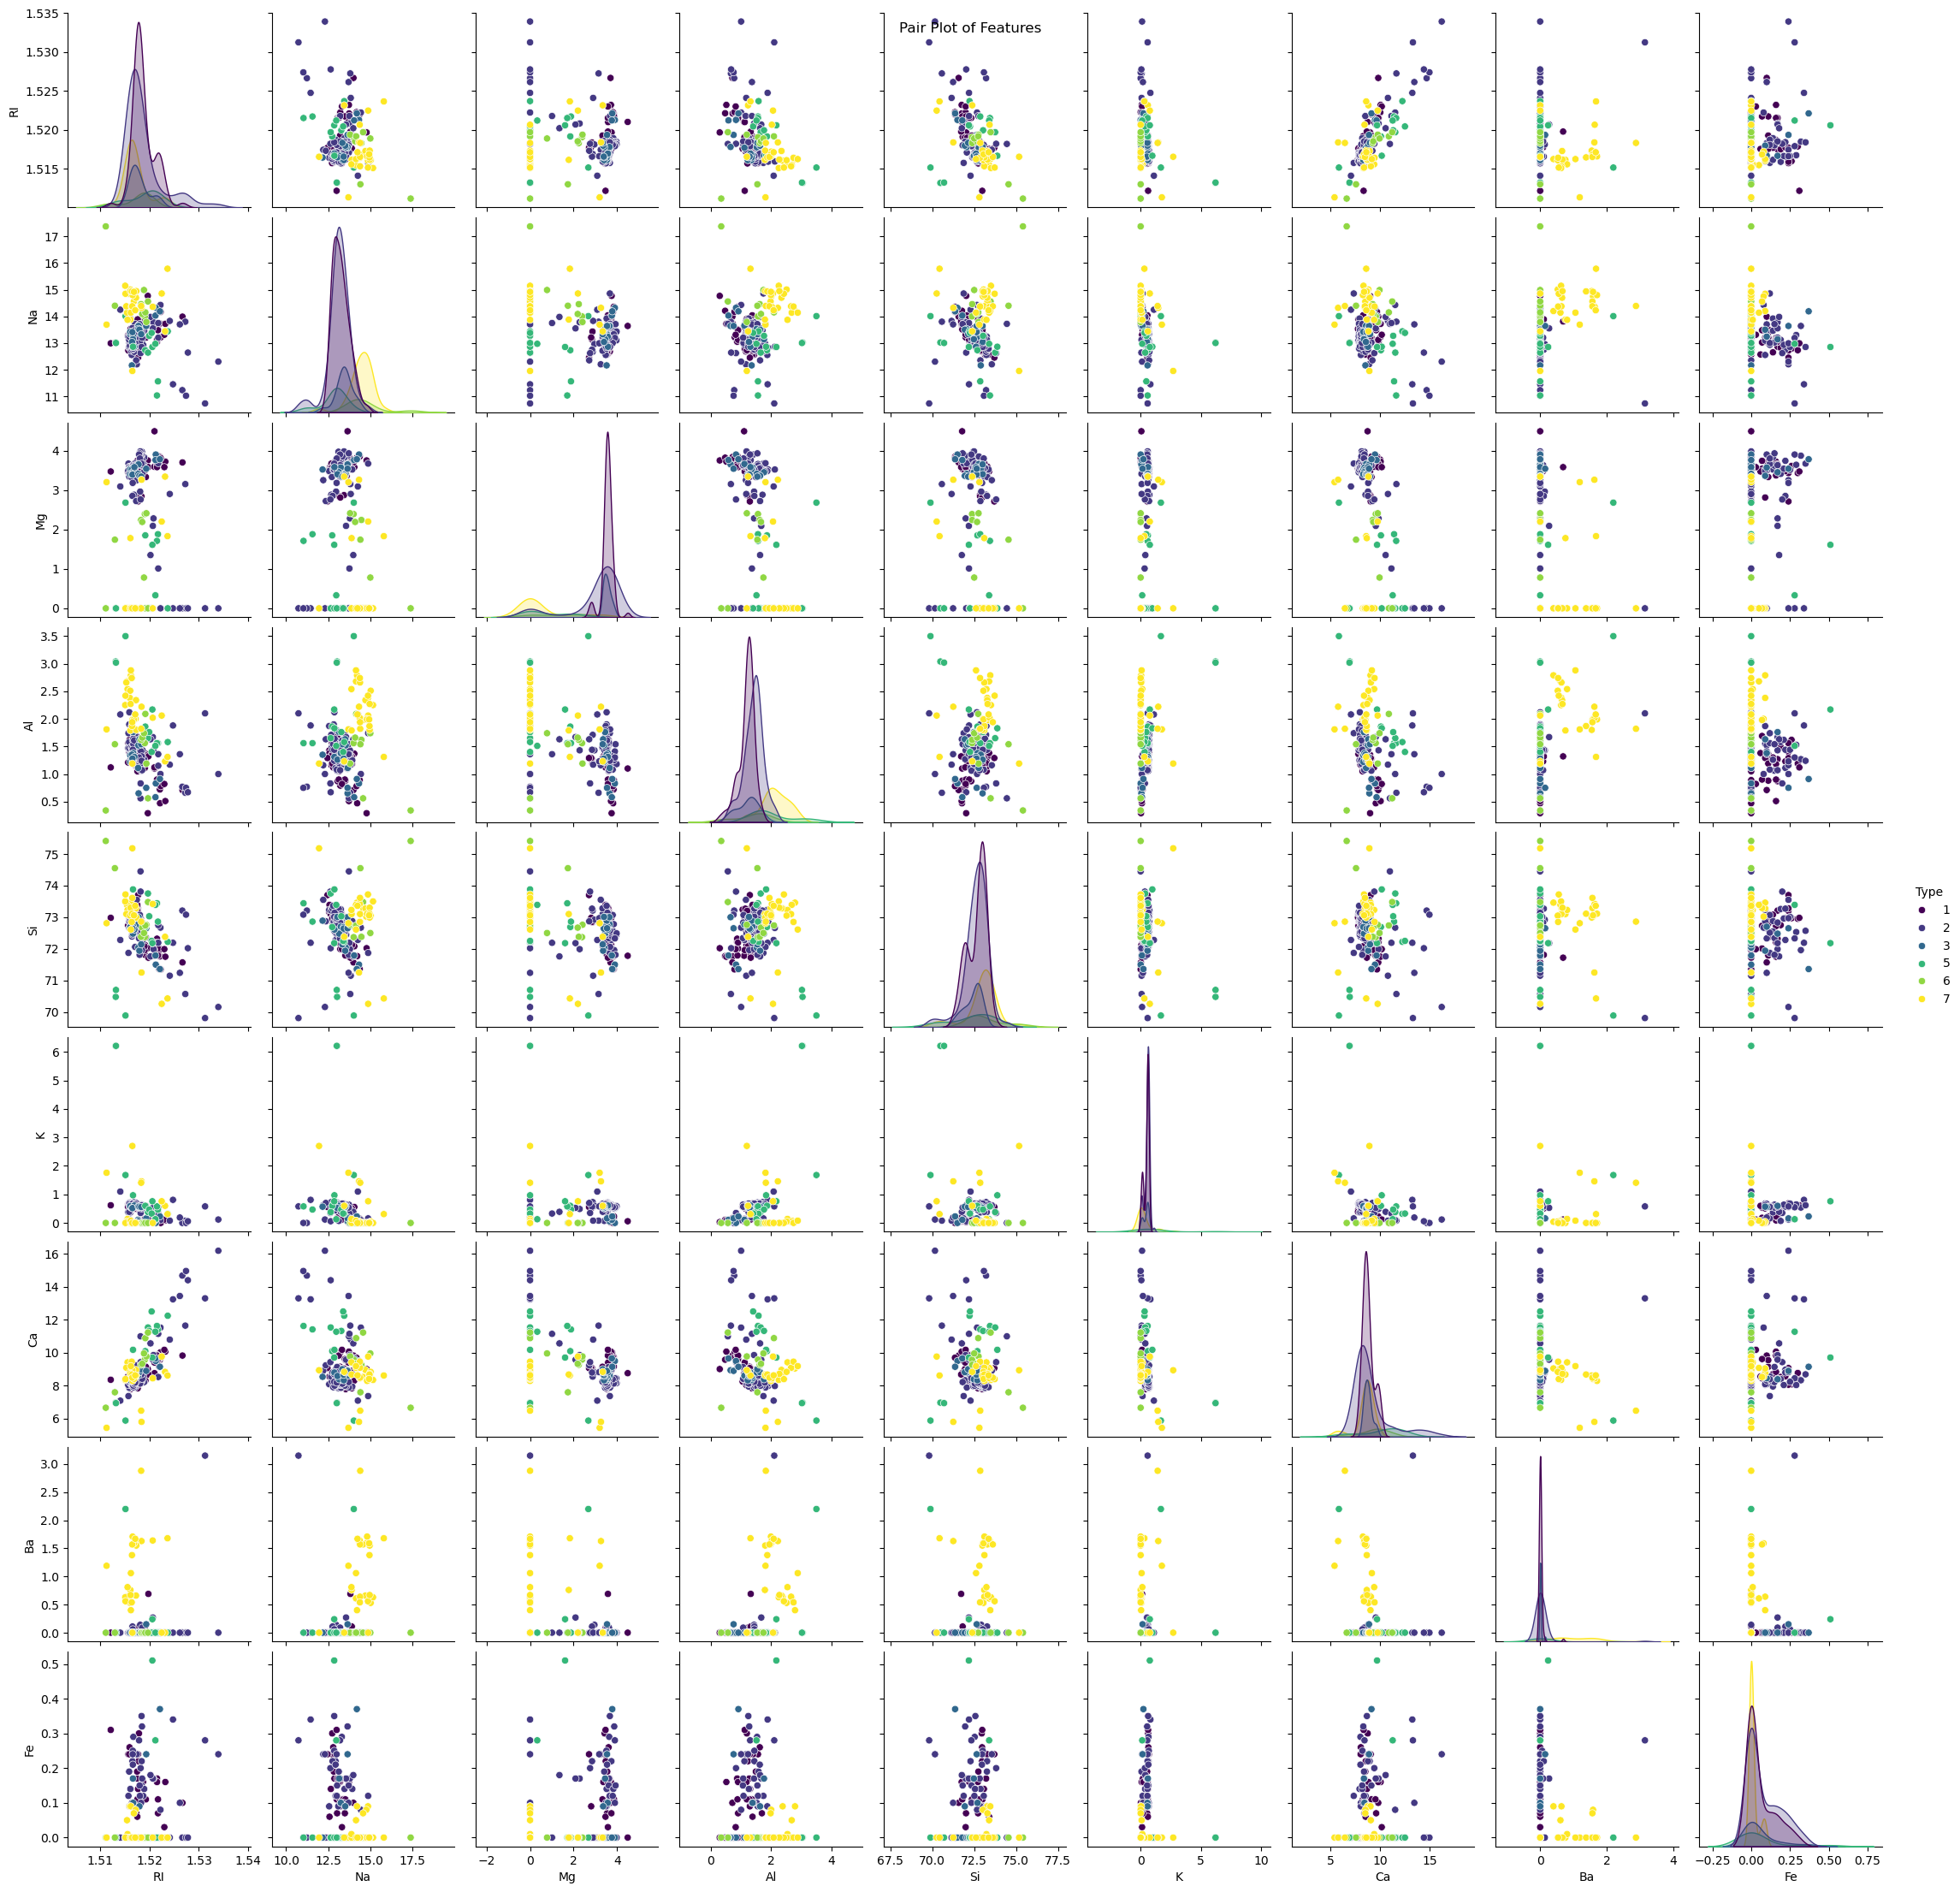

In [14]:
# Pair plot for selected features
sns.pairplot(df, hue='Type', palette='viridis')
plt.suptitle('Pair Plot of Features')
plt.show()

# 4. Random Forest Model Implementation

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Separate features and target variable
X = df.drop(columns=['Type'])
y = df['Type']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)


In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Train a Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Evaluate on the test set
y_pred = rf_model.predict(X_test)

# Print metrics
print("\nRandom Forest Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(f"Precision: {precision_score(y_test, y_pred, average='weighted'):.2f}")
print(f"Recall: {recall_score(y_test, y_pred, average='weighted'):.2f}")
print(f"F1-Score: {f1_score(y_test, y_pred, average='weighted'):.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Random Forest Model Evaluation:
Accuracy: 0.83
Precision: 0.83
Recall: 0.83
F1-Score: 0.82

Classification Report:
              precision    recall  f1-score   support

           1       0.83      0.95      0.89        21
           2       0.83      0.83      0.83        23
           3       1.00      0.40      0.57         5
           5       0.33      0.25      0.29         4
           6       0.67      1.00      0.80         2
           7       1.00      1.00      1.00         9

    accuracy                           0.83        64
   macro avg       0.78      0.74      0.73        64
weighted avg       0.83      0.83      0.82        64



In [17]:
pip install --upgrade scikit-learn

Note: you may need to restart the kernel to use updated packages.


# 5. Bagging and Boosting Methods

In [18]:
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier

# Bagging with Random Forest
bagging_model = BaggingClassifier(estimator=RandomForestClassifier(), random_state=42)
bagging_model.fit(X_train, y_train)
bagging_pred = bagging_model.predict(X_test)

print("\nBagging Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, bagging_pred):.2f}")

# Boosting with Gradient Boosting
boosting_model = GradientBoostingClassifier(random_state=42)
boosting_model.fit(X_train, y_train)
boosting_pred = boosting_model.predict(X_test)

print("\nBoosting Model Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, boosting_pred):.2f}")



Bagging Model Evaluation:
Accuracy: 0.80

Boosting Model Evaluation:
Accuracy: 0.80


# 1. Explain Bagging and Boosting methods. How is it different from each other.
Bagging is an ensemble learning technique that trains multiple models (called base learners) independently on random subsets of the training data. It combines their predictions (via voting for classification or averaging for regression) to improve performance.
Steps in Bagging:
Randomly select subsets of data from the training dataset with replacement (this is called bootstrapping).
Train a separate model (e.g., decision trees) on each subset.
Combine predictions from all models using aggregation:
Majority vote for classification.
Mean/average for regression.
Example Algorithm:
Random Forest: An extension of bagging that builds multiple decision trees and uses random feature selection along with bootstrapping.
Boosting:
Definition:
Boosting is an ensemble learning technique that trains models sequentially, where each model tries to correct the mistakes of the previous one. The final prediction is a weighted combination of all models.
Steps in Boosting:
Train the first model (weak learner) on the dataset.
Calculate the errors made by the model.
Assign higher weights to the misclassified samples to emphasize them in the next iteration.
Train a new model on the updated dataset, focusing on correcting these errors.
Combine all models' predictions with appropriate weights.
Example Algorithms:
AdaBoost: Adjusts sample weights based on errors.
Gradient Boosting: Optimizes a loss function (e.g., log-loss) sequentially.
Advanced variants: XGBoost, LightGBM, CatBoost.

### 2. Explain how to handle imbalance in the data.
Imbalanced data occurs when one class significantly outweighs another.
Example: In fraud detection, fraudulent transactions (minority class) are much fewer than legitimate ones (majority class).
A. Oversampling:
Increases the number of samples in the minority class by duplication or generating synthetic data.
B. Undersampling:
Reduces the number of samples in the majority class to balance the dataset.
Risk: Losing important information from the majority class.
2. Data Augmentation:
Generate synthetic samples using techniques like SMOTE or ADASYN, or augment the data (e.g., flipping, rotating, or modifying features). ###
